<a href="https://colab.research.google.com/github/Ibilis37/DSP_/blob/main/%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B8%2Bpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import scipy as sc

### Задание 1

In [23]:
def create_new_signal(filename, N=32):
  real_part = np.random.rand(N)
  img_part = np.random.rand(N)
  complex_numbers = real_part + 1j*img_part

  with open(f'{filename}.txt', 'w') as f:
      for number in complex_numbers:
          f.write(str(number.real) + ' ' + str(number.imag) + '\n')
create_new_signal('data')

In [17]:
def write(y,filename):
    with open(f"{filename}.txt",'w') as f:
        for elem in y:
          re, im = elem.real, elem.imag
          f.write(f"{re} {im}\n")

def read(filename):
    x=[]
    with open(f"{filename}.txt", 'r') as file:
        for line in file:
            new_line = line.split(" ")
            x.append(complex(float(new_line[0]), float(new_line[1])))
    return x

In [26]:
x=read("data")
y=sc.fft.fft(x,norm="ortho")
write(y,"fft_python")

### Задание 4

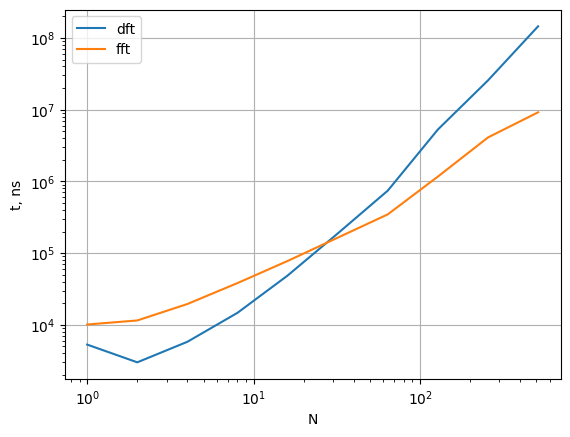

In [21]:
time_dft_fft=read("time_dft_fft")
time_dft = []
time_fft = []
count=[]
for i in range(len(time_dft_fft)):
    time_dft.append(time_dft_fft[i].real)
    time_fft.append(time_dft_fft[i].imag)
    count.append(2**i)
plt.loglog(count, time_dft, label="dft")
plt.loglog(count, time_fft, label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t, ns")
plt.grid()

### Задание 7

In [29]:
create_new_signal('x')
create_new_signal('y')
x=read("x")
y=read("y")
conv_python=np.convolve(x,y)
write(conv_python, "python_conv")

### Задание 8

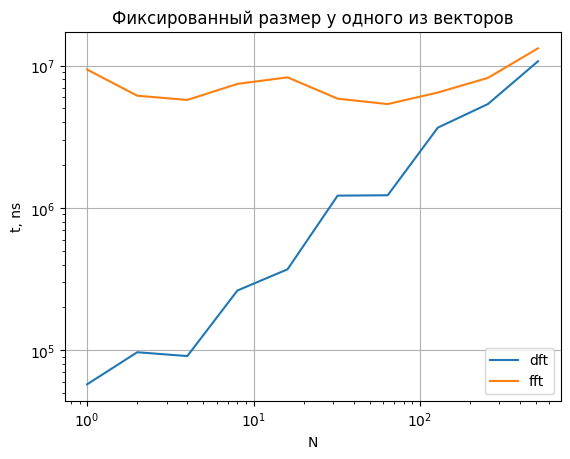

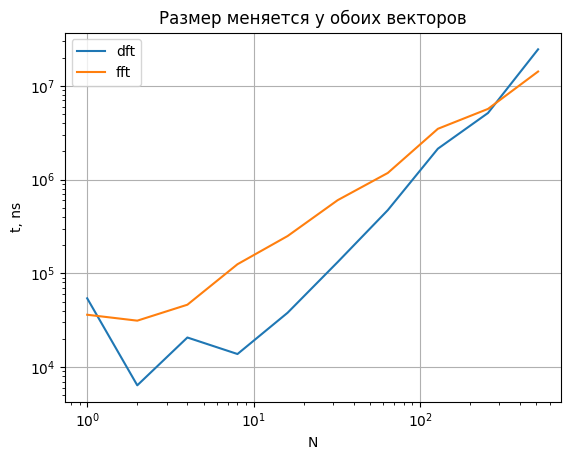

In [31]:
import matplotlib.pyplot as plt
time_conv1=read("time_conv1")
time_conv2=read("time_conv2")
time_fconv1=read("time_fconv1")
time_fconv2=read("time_fconv2")
time1,time2,time3,time4,num=[],[],[],[],[]
for i in range(len(time_conv1)):
    time1.append(time_conv1[i].imag)
    time2.append(time_conv2[i].imag)
    time3.append(time_fconv1[i].imag)
    time4.append(time_fconv2[i].imag)
    num.append(2**i)

plt.loglog(num,time1, label="dft")
plt.loglog(num,time3, label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t, ns")
plt.title("Фиксированный размер у одного из векторов")
plt.grid()

plt.figure()
plt.loglog(num,time2, label="dft")
plt.loglog(num,time4, label="fft")
plt.legend()
plt.xlabel("N")
plt.ylabel("t, ns")
plt.title("Размер меняется у обоих векторов")
plt.grid()